In [2]:
import pandas as pd
from matplotlib import pyplot
from pandas import to_datetime
from fbprophet import Prophet

In [3]:
# load data
df = pd.read_csv('monthly-car-sales.csv')
# summarize shape
df.shape

(108, 2)

In [4]:
df.head()

,Month,Sales
0,1960-01,6550
1,1960-02,8728
2,1960-03,12026
3,1960-04,14395
4,1960-05,14587


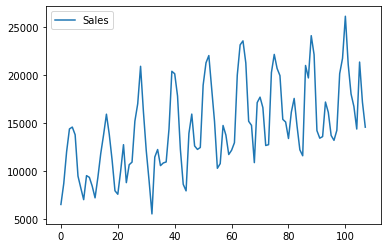

In [5]:
df.plot()
pyplot.show()

In [6]:
# prepare expected column names
df.columns = ['ds', 'y']
df['ds']= to_datetime(df['ds'])

In [7]:
# define the model
model = Prophet()
# fit the model
model.fit(df)

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
C:\Users\Sai Nidhi\Anaconda3\lib\site-packages\pystan\misc.py:399: FutureWarning:

Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.



# Save the model

In [7]:
import joblib
joblib.dump(model, "sales.sav")

['sales.sav']

# Test with future predictions

In [10]:
future = list()
for i in range(1, 13):
    date = '1969-%02d' % i
    print(date)
    future.append([date])
future = pd.DataFrame(future)
future.columns = ['ds']
future['ds']= to_datetime(future['ds'])

1969-01
1969-02
1969-03
1969-04
1969-05
1969-06
1969-07
1969-08
1969-09
1969-10
1969-11
1969-12


In [11]:
forecast=model.predict(future)

In [12]:
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']]

,ds,yhat,yhat_lower,yhat_upper
0,1969-01-01,15376.752451,13729.421592,16995.966021
1,1969-02-01,16138.731483,14484.420546,17703.478388
2,1969-03-01,21351.103785,19819.830527,22810.013611
3,1969-04-01,23479.854771,21971.888265,24913.918607
4,1969-05-01,24992.388293,23548.883629,26625.440222
5,1969-06-01,22254.527429,20671.033329,23796.754674
6,1969-07-01,17901.835593,16371.452543,19499.790600
7,1969-08-01,15730.040830,14151.520766,17300.068331
8,1969-09-01,14235.917670,12717.947618,15794.608600
9,1969-10-01,18672.473959,17094.533468,20307.941880


C:\Users\Sai Nidhi\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1402: FutureWarning:

Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.

C:\Users\Sai Nidhi\Anaconda3\lib\site-packages\matplotlib\axes\_base.py:278: FutureWarning:

Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.



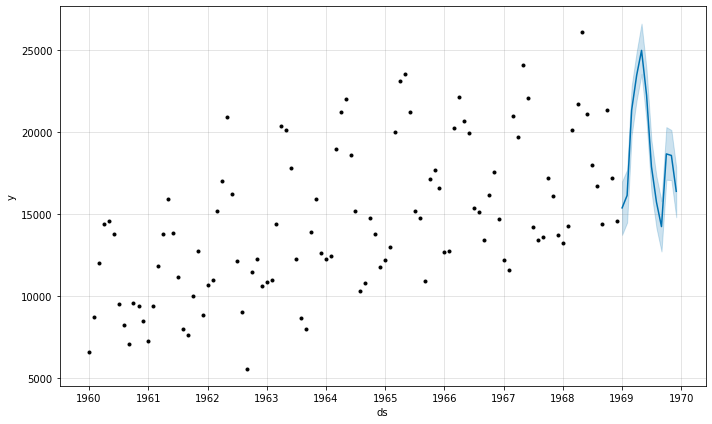

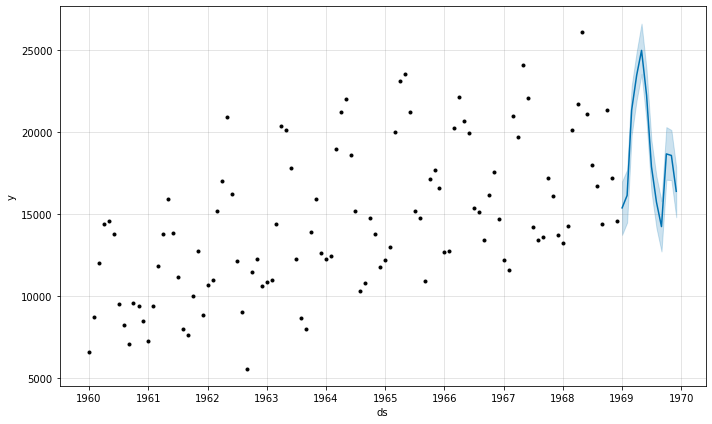

In [13]:
model.plot(forecast)